# Developing the Intuition Behind Modern Portfolio Theory With an Interactive Visualization in Python

Anyone seeking to manage an investment portfolio has probably already been presented to the Modern Portfolio Theory (MPT), which was introduced in 1952 by Harry Markowitz in the work entitled "Portfolio Selection", published by The Journal of Finance. The proposed framework is well documented and was extensively developed over the last decades, however some results are counter-intuitive and often taken for granted, making it easy to be overlooked by someone new in the field. In this article I will explore this results with an interactive visualization using Jupyter Widgets that will hopefully help you appreciate the beauty of the methodology. The purpose is not to make a comprehensive introduction to MPT and efficient frontier, but emphasize the power of combining risky assets in a portfolio.

## Risk and Returns
Let's consider  that we want to invest our money in stocks, and just to keep it simple, in this article we will consider investing in only two stocks, Stock A and Stock B. The question that follows is how do we split our money between these two assets? We can put 50% of our money into stock A and 50% into Stock B, but is that a good option? 
At this point the theory proposed by Markowitz comes in place, which consists of a model to build an optimized portfolio of assets that maximizes the expected return for a given level of risk. So in order to apply it, we need to understand the return and risk characteristics of each asset to finally combine them to assess the expected returns of our portfolio and the risk we are willing to take to get this return.
Let's look at how can we define these two characteristics of our stocks.

## Returns

Considering $P_{t}$ the price of a security at time $t$ and $P_{t+1}$ the price of the security at time ${t+1}$, the return of this security from time $t$ to time ${t+1}$ is given by:

$$ R_{t,t+1} = \frac{P_{t+1}-P_{t}}{P_{t}} $$

This equation can be rearanged and expressed in a slightly more compact form:

$$ R_{t,t+1} = \frac{P_{t+1}}{P_{t}} - 1 $$

### Measuring Risk

The most common parameter used to measure risk is the volatility, which is defined as the standard deviation of the returns, and is calculated dividing the squared deviations of the returns to the mean and then taking the square root

$$
\sigma_{R}=\sqrt{\frac{1}{N} \sum_{i=1}^{N}(R_i - \overline{R})^2}
$$


### Building a Portfolio with 2 assets
Now that we have defined these two parameters we can start to understand the relationship between the two assets by plotting the returns on Y axis and volatility on X axis.
We are not interested at the moment in calculating these parameters, but in understanding how they contribute to portfolio construction, so let's assume that Stock A return $R_a$ is 8% and its volatility $\sigma_a$ is equal to 12%. We can also assume that Stock B return $R_b$ is 14% and volatility $\sigma_b$ is 16% and plot them using the following python code.



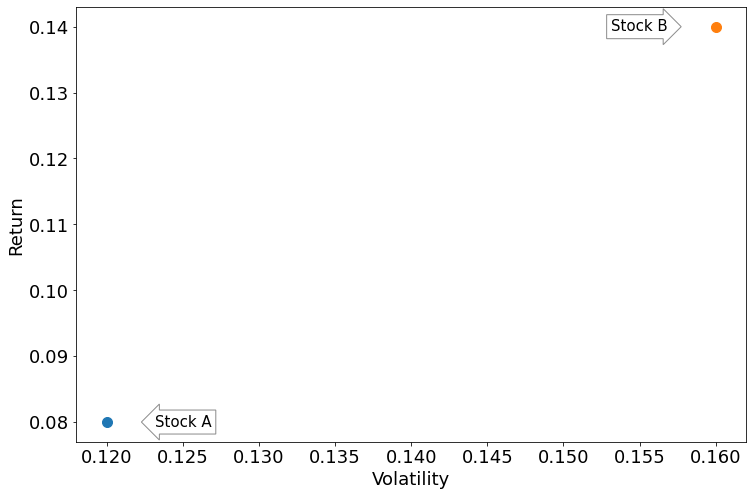

In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})

Ra = 0.08
Rb = 0.14
sigma_a = 0.12
sigma_b = 0.16

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(sigma_a, Ra, marker="o",  markersize=10)
ax.plot(sigma_b, Rb , marker="o",  markersize=10)
ax.set_xlabel('Volatility')
ax.set_ylabel('Return')

bbox_props_a = dict(boxstyle="larrow", fc="w", ec="0.5", alpha=0.9)
ax.text(sigma_a+0.005, Ra, "Stock A", ha="center", va="center", size=15,
        bbox=bbox_props_a)

bbox_props_b = dict(boxstyle="rarrow", fc="w", ec="0.5", alpha=0.9)
ax.text(sigma_b-0.005, Rb, "Stock B", ha="center", va="center", size=15,
        bbox=bbox_props_b)

plt.show()




Considering now the case of a portfolio consisting of these two stocks, we can now assign weights to each of them, being wa  the weight of Stock A and wb the weight of Stock B. In a simple case where we equally split our money into the two stock (wa = wb = 50%) it is somehow intuitive to think that the return of the portfolio composed by these two stocks will be the weighted average of the returns:

$$R(w_a, w_b) = w_a . R_a + w_b . R_b$$

where $R_a$ is the return of Stock A and $R_b$ is the return of Stock B, and weights $w_a$ and $w_b$ 
or in more generalized case

$$R_p = \sum_{i=1}^k w_i R_i$$

or in matrix notation

$$R_p = \mathbf{w}^T \mathbf{R}$$

We may be inclined to think that this is also the case of the volatility. However, the volatility of a portfolio is not simply given by the weighted average of the volatility of each individual asset, but depends also on the correlation of the assets. The expression of the portfolio volatility in the case of a two-assets portfolio is given by:

$$\sigma^2(w_a, w_b) =\sigma^2_a w_a^2 + \sigma^2_b w_b^2 + 2 w_a w_b \sigma_a \sigma_b \rho_ {a,b}$$

The multi-asset portfolio variance can be written as

$$\sigma_p^2 = \sum_{i=1}^k  \sum_{j=1}^k w_i w_j \sigma_i \sigma_j \rho_{i,j}$$

The term 𝜌 that appears in the above equation is the correlation of the two assets and can range from -1 (indicating a perfect inverse correlation) and 1 (indicating a perfect correlation). It is exactly this term that is responsible for the surprising results of the MPT. Only in the case of perfect correlated assets (𝜌=1) the volatility is simply the weighted average of the individual assets. In this specific case, the portfolio risk-return will look like a straight line between the individual assets as shown below, and each point in the line represents different allocations or weights to each stock.


However, in most practical cases the value of the correlation will not be equal to one, and will lie anywhere between -1 and 1. We can see what happens when we assign different values to the correlation and plot them on the above chart. In order to do that we need to code the equations for portfolio return and portfolio volatility given before. We also need to assign varying weights for the stocks in a way that the sum of weight of the two stocks is always 1. This can be implemented with the following code:


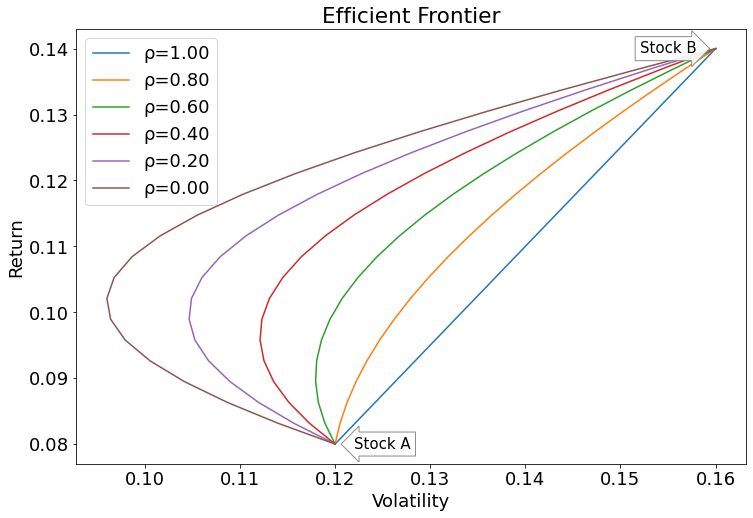

In [5]:
# Define different values of correlation betwenn assets, varying from 1 to 0
rho = np.linspace(1, 0, 6)

# size of the plot
fig, ax = plt.subplots(figsize=(12,8))

# creating the weights of the two stocks
wa =  np.linspace(0, 1, 20)
wb =  np.linspace(1, 0, 20)

# Make plots of the efficient frontier with different values of correlation
for rho in rho:
    # calculating the portfolio return as the weighted average of the individual returns
    portfolio_return = wa*Ra + wb*Rb
    # calculating portfolio varince and volatility
    variance = sigma_a**2 * wa**2 + sigma_b**2 * wb**2 + 2*wa*wb*sigma_a*sigma_b*rho
    portfolio_vol = np.sqrt(variance)
    
    # plotting the efficient frontier
    ax.plot(portfolio_vol, portfolio_return, label='\u03C1={:.2f}'.format(rho))
    ax.set_xlabel('Volatility')
    ax.set_ylabel('Return')

# Adding annotations to plot
bbox_props_a = dict(boxstyle="larrow", fc="w", ec="0.5", alpha=0.9)
ax.text(sigma_a+0.005, Ra, "Stock A", ha="center", va="center", size=15,
        bbox=bbox_props_a)

bbox_props_b = dict(boxstyle="rarrow", fc="w", ec="0.5", alpha=0.9)
ax.text(sigma_b-0.005, Rb, "Stock B", ha="center", va="center", size=15,
        bbox=bbox_props_b)
 
plt.title('Efficient Frontier')
plt.legend()
plt.show()




We can now clearly see that by combining two assets that are not perfectly correlated (𝜌 different from 1), we can build a portfolio with a lower volatility than any of the individual assets. The lines shown above are known as the Efficient Frontier, and represent asset allocation that gives minimizes the risk of the portfolio for a given return.
In order to explore this characteristic even further, we can create an interactive visualization with Jupyter Widgets, allowing us to change all the parameters and instantly see their effects on the risk-return profile of our portfolio.


In [1]:
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams.update({'font.size': 18})

def show_EF(Ra, Rb, sigma_a, sigma_b, rho):
    wa =  np.linspace(0, 1, 20)
    wb =  np.linspace(1, 0, 20)

    portfolio_return = wa*Ra + wb*Rb
    variance = sigma_a**2 * wa**2 + sigma_b**2 * wb**2 + 2*wa*wb*sigma_a*sigma_b*rho
    portfolio_vol = np.sqrt(variance)

    fig, ax = plt.subplots(figsize=(12,8))
    ax.plot(portfolio_vol, portfolio_return, '-.', label='\u03C1={:.2f}'.format(rho))
    ax.plot(portfolio_vol[0], portfolio_return[0], marker="o",  markersize=10)
    ax.plot(portfolio_vol[-1], portfolio_return[-1], marker="o",  markersize=10)
    ax.set_xlabel('Volatility')
    ax.set_ylabel('Return')

    bbox_props_a = dict(boxstyle="larrow", fc="w", ec="0.5", alpha=0.9)
    ax.text(sigma_a+0.005, Ra, "Stock A", ha="center", va="center", size=15,
            bbox=bbox_props_a)

    bbox_props_b = dict(boxstyle="rarrow", fc="w", ec="0.5", alpha=0.9)
    ax.text(sigma_b-0.005, Rb, "Stock B", ha="center", va="center", size=15,
            bbox=bbox_props_b)

    plt.show()




EF_controls = widgets.interactive(show_EF,
                                Ra = widgets.FloatSlider(min=0, max=0.3, step=0.05, value=0.08, description="Return A"), 
                                Rb = widgets.FloatSlider(min=0, max=0.3, step=0.05, value=0.14, description="Return B"),
                                sigma_a = widgets.FloatSlider(min=0, max=0.5, step=0.01, value=0.12, description="Vol A"),
                                sigma_b = widgets.FloatSlider(min=0, max=0.5, step=0.01, value=0.16, description="Vol B"),
                                rho= widgets.FloatSlider(min=-1., max=1., step=0.2, value=1, description="Correlation")
)
display(EF_controls)

interactive(children=(FloatSlider(value=0.08, description='Return A', max=0.3, step=0.05), FloatSlider(value=0…

# Conclusion
The applications of the Modern Portfolio Theory go much further than the simple 2-asset portfolio example used here. Many fundamental aspects were not explored in this article, but my intention was to draw attention to the non-intuitive role that correlation plays in a portfolio, enabling risk reduction beyond what would be possible with single assets.